In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## import data

In [2]:
df_o2 = pd.read_csv('../Dissertation_projects/Data/CTD/O2_Summary_Stats.csv', sep=',', index_col=0)

In [3]:
df_meta = pd.read_csv('../Dissertation_projects/Data/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta['code'] = df_meta['Station'] + '_' + df_meta['Trip']

In [4]:
df_por = pd.read_csv('../Dissertation_projects/Data/Porosity/Porosity.csv', sep=',', index_col = 0)
df_por['code'] = df_por['Stn'] + '_' + df_por['camp']

In [5]:
df_hights = pd.read_csv('../Dissertation_projects/Data/Hights.csv', sep=',')

df_hights['code'] = df_hights['Stn'] + '_' + df_hights['Camp']
#df_hights.drop("Stn", axis=1, inplace=True)
#df_hights.drop("Camp", axis=1, inplace=True)
df_hights.index = df_hights['code']
df_hights.drop("code", axis=1, inplace=True)

In [6]:
PW_CDOM_data = '../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_PW.csv'

df = pd.read_csv(PW_CDOM_data, sep=',', index_col=0)
df = pd.DataFrame(df)

df.index = df.index.astype(str)
df_meta.index = df_meta.index.astype(str)

df = df.drop('212500')
df = df.drop('212600')
df = df.drop('212800')

df.columns = ['a' + col for col in df.columns]

df_cdom = df.join(df_meta, how='inner')

df_cdom['Sample_depth'] = pd.to_numeric(df_cdom['Sample_depth'], errors='coerce')
df_cdom['file_id'] = df_cdom['afile_id']
df_cdom = df_cdom.drop('afile_id', axis = 1)

df_cdom

,a250,a251,a252,a253,a254,a255,a256,a257,a258,a259,...,BC_time,BC_Chamber_vol_(L),Type,Waveguide_used,Notes,Flagged,Salinity,date_time,code,file_id
212211,12.695115,12.271474,12.008400,11.834758,11.608563,11.540281,11.219037,11.243572,11.043856,10.877380,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.415330,2021-07-19,St.14_GOM2021,ID212211_Absorbance_01
212211,12.723170,12.193681,12.088771,11.724050,11.639445,11.500733,11.239978,11.156721,11.086767,10.850033,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.415330,2021-07-19,St.14_GOM2021,ID212211_Absorbance_02
212211,12.817412,12.481797,12.290850,12.096403,11.923546,11.797288,11.473194,11.390093,11.343552,11.088980,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.415330,2021-07-19,St.14_GOM2021,ID212211_Absorbance_03
212211,12.869270,12.626797,12.361186,12.179295,12.030715,11.932248,11.677815,11.639191,11.446929,11.340365,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.415330,2021-07-19,St.14_GOM2021,ID212211_Absorbance_04
212211,13.401501,12.597907,12.436667,12.238062,12.203909,11.930917,11.767257,11.738062,11.526214,11.384943,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.415330,2021-07-19,St.14_GOM2021,ID212211_Absorbance_05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225322,40.279132,39.406527,38.857851,38.270139,37.702525,37.184126,36.858768,36.338800,36.043199,35.773239,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.007597,2022-07-23,St.MK_GOM22SU,225322_1_64
225322,40.011593,39.489718,38.709977,38.292514,37.774322,37.194685,36.799001,36.423871,35.918260,35.635871,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.007597,2022-07-23,St.MK_GOM22SU,225322_2_65
225323,80.082073,78.995700,78.151809,77.275706,76.365229,75.595165,75.135591,74.498679,73.781656,73.400768,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.007597,2022-07-23,St.MK_GOM22SU,225323_0_66
225323,79.347397,79.014304,77.951527,77.198921,76.045130,75.594366,74.856018,74.275584,73.613136,73.323155,...,NaN,NaN,PW,1CM CUV,NaN,NaN,36.007597,2022-07-23,St.MK_GOM22SU,225323_1_67


In [7]:
WC_CDOM_data = '../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_WC.csv'

df = pd.read_csv(WC_CDOM_data, sep=',', index_col=0)
df = pd.DataFrame(df)

df.index = df.index.astype(str)
df_meta.index = df_meta.index.astype(str)

df.columns = ['a' + col for col in df.columns]

df_cdom_wc = df.join(df_meta, how='inner')

df_cdom_wc['Sample_depth'] = pd.to_numeric(df_cdom_wc['Sample_depth'], errors='coerce')
df_cdom_wc['file_id'] = df_cdom_wc['afile_id']
df_cdom_wc = df_cdom_wc.drop('afile_id', axis = 1)

df_cdom_wc

,a250,a251,a252,a253,a254,a255,a256,a257,a258,a259,...,BC_time,BC_Chamber_vol_(L),Type,Waveguide_used,Notes,Flagged,Salinity,date_time,code,file_id
Sample_ID,,,,,,,,,,,,,,,,,,,,,
212831,1.582213,1.166499,1.145509,1.116018,1.132758,0.999233,1.143973,0.951363,1.026407,0.910059,...,NaN,NaN,NISK,NaN,NaN,NaN,34.931789,2021-07-25,St.11_GOM2021,WC_Abs_GoM21Su_ID212831_Absorbance_01
212831,1.420738,1.265245,1.118060,1.088025,1.124283,1.010358,1.075508,0.890705,0.961718,0.842312,...,NaN,NaN,NISK,NaN,NaN,NaN,34.931789,2021-07-25,St.11_GOM2021,WC_Abs_GoM21Su_ID212831_Absorbance_02
212831,1.238159,1.200902,1.181345,1.141725,1.070125,1.011730,1.028852,0.933714,0.964997,0.833017,...,NaN,NaN,NISK,NaN,NaN,NaN,34.931789,2021-07-25,St.11_GOM2021,WC_Abs_GoM21Su_ID212831_Absorbance_03
212832,1.394769,1.070396,1.024167,1.060669,1.073567,0.884572,0.912095,0.816238,0.879382,0.750754,...,NaN,NaN,NISK,NaN,NaN,NaN,34.932482,2021-07-25,St.11_GOM2021,WC_Abs_GoM21Su_ID212832_Absorbance_01
212832,1.741549,1.055882,1.004097,0.949880,0.958139,0.897783,0.838781,0.822236,0.882299,0.743585,...,NaN,NaN,NISK,NaN,NaN,NaN,34.932482,2021-07-25,St.11_GOM2021,WC_Abs_GoM21Su_ID212832_Absorbance_02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225339,6.665595,6.690608,6.790543,6.745253,6.841794,6.891832,7.223834,7.041561,7.045235,6.984060,...,NaN,NaN,NISK,LWCC 50 CM #2,NaN,NaN,19.950076,2022-07-23,St.MK_GOM22SU,225339_1_103
225339,7.268334,6.669069,6.778397,6.863410,6.811121,6.912300,7.216803,7.070359,7.037288,7.138603,...,NaN,NaN,NISK,LWCC 50 CM #2,NaN,NaN,19.950076,2022-07-23,St.MK_GOM22SU,225339_2_104
225340,6.334720,6.691976,6.774561,6.781040,6.859812,6.861516,7.002140,6.981377,7.088624,7.072872,...,NaN,NaN,NISK,LWCC 50 CM #2,NaN,NaN,19.954716,2022-07-23,St.MK_GOM22SU,225340_0_105


## Data for flux calculations 

In [8]:
#hights data
df_hights = pd.read_csv('../Dissertation_projects/Data/Hights.csv', sep=',')

df_hights['code'] = df_hights['Stn'] + '_' + df_hights['Camp']
#df_hights.drop("Stn", axis=1, inplace=True)
#df_hights.drop("Camp", axis=1, inplace=True)
df_hights.index = df_hights['code']
df_hights.drop("code", axis=1, inplace=True)

In [9]:
#porosity data 
df_por = pd.read_csv('../Dissertation_projects/Data/Porosity/Porosity.csv', sep=',', index_col = 0)
df_por['code'] = df_por['Stn'] + '_' + df_por['camp']

In [10]:
#location data 
df_lat_lon = df_meta.groupby('code').agg({'Lat': 'mean', 'Lon': 'mean'}).reset_index().set_index('code')

## slope calculations

In [11]:
#figure calculate pore water 

#CDOM slopes

df_cdom = df_cdom.sort_values(by='code')
codes = df_cdom['code'].unique()

print(codes)
len(codes)

['St.11_GOM2021' 'St.11_GOM21FA' 'St.11_GOM22SU' 'St.12_GOM21FA'
 'St.12_GOM22SU' 'St.13_GOM21FA' 'St.13_GOM22SP' 'St.13_GOM22SU'
 'St.14_GOM2021' 'St.14_GOM21FA' 'St.14_GOM22SP' 'St.14_GOM22SU'
 'St.15_GOM2021' 'St.15_GOM21FA' 'St.15_GOM22SP' 'St.15_GOM22SU'
 'St.16_GOM2021' 'St.16_GOM21FA' 'St.16_GOM22SP' 'St.16_GOM22SU'
 'St.2_GOM2021' 'St.2_GOM21FA' 'St.2_GOM22SP' 'St.2_GOM22SU'
 'St.4_GOM21FA' 'St.4_GOM22SP' 'St.4_GOM22SU' 'St.5B_GOM21FA'
 'St.5B_GOM22SP' 'St.5B_GOM22SU' 'St.7_GOM2021' 'St.7_GOM21FA'
 'St.7_GOM22SP' 'St.7_GOM22SU' 'St.9_GOM21FA' 'St.9_GOM22SP'
 'St.9_GOM22SU' 'St.MK_GOM21FA' 'St.MK_GOM22SP' 'St.MK_GOM22SU']


40

[0.35 0.35 0.35 1.05 1.05 1.05 1.05 1.75 1.75 1.75]


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\3285258102.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  yy = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\3285258102.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xx = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a350'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\3285258102.py:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xx2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].rave

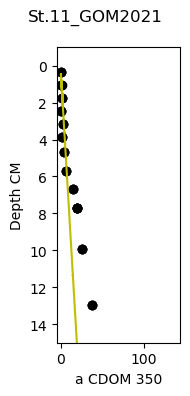

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


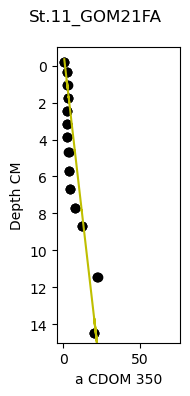

[-0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


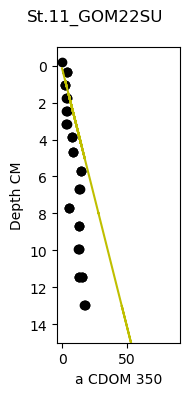

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


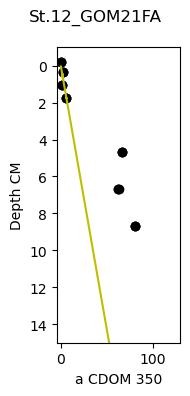

[-0.2  -0.2  -0.2   0.35  0.35  0.35]


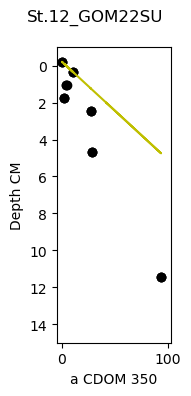

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


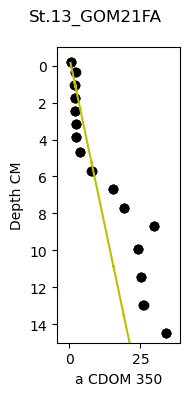

[-0.2  -0.2  -0.2   0.35  0.35  0.35]


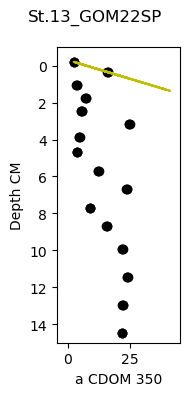

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


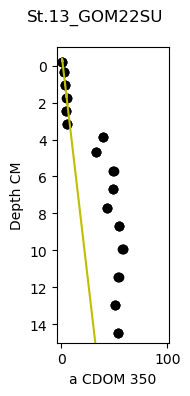

[-0.2  -0.2  -0.2  -0.2  -0.2   0.35  0.35  0.35  0.35  0.35  1.05  1.05
  1.05  1.05  1.05  1.75  1.75  1.75  1.75  1.75]


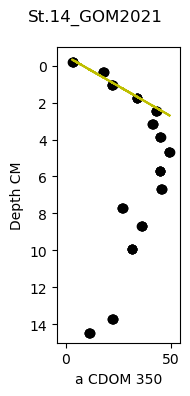

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


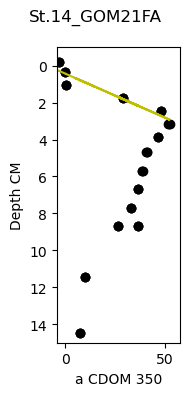

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75
  1.75  1.75  1.75]


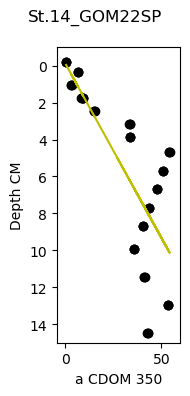

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


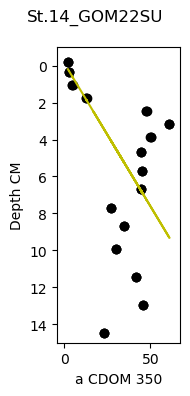

[0.35 1.05 1.75]


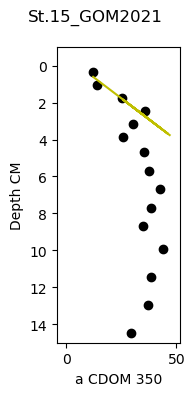

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.75  1.75  1.75]


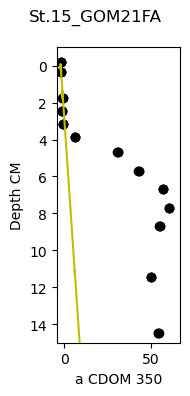

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


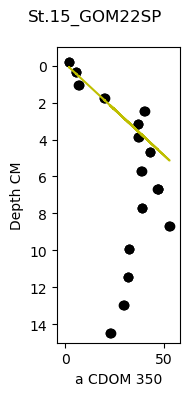

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


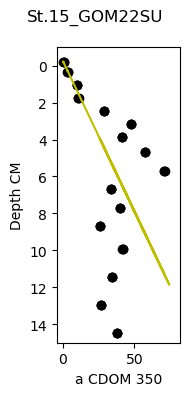

[-0.2  -0.2   0.35  1.05  1.75]


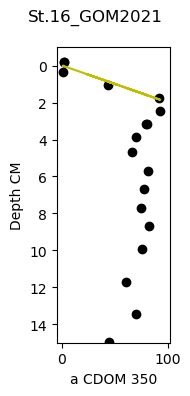

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


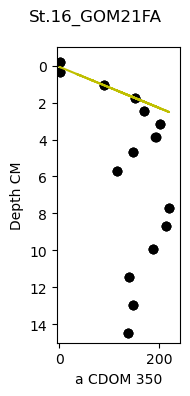

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


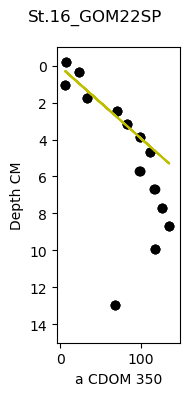

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


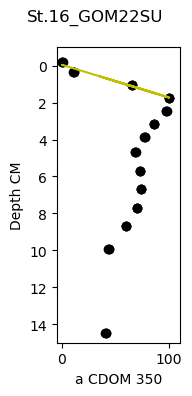

[0.35 1.05 1.75]


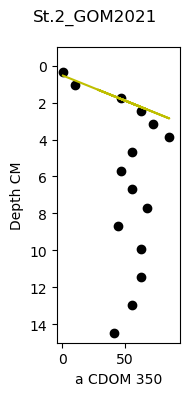

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


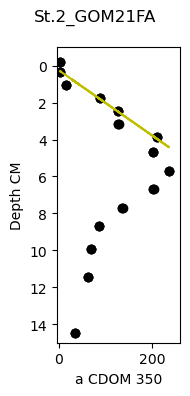

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


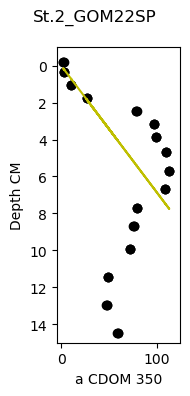

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


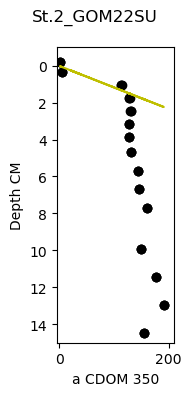

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


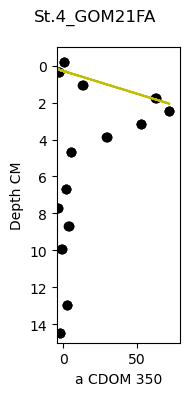

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


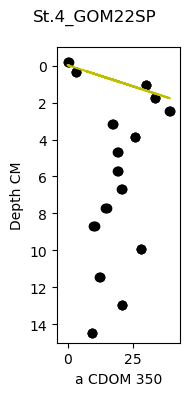

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.85  1.85  1.85]


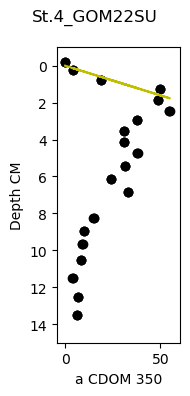

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


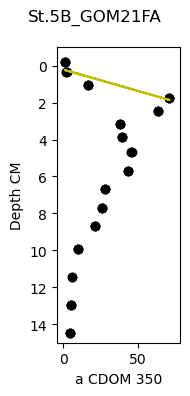

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75]


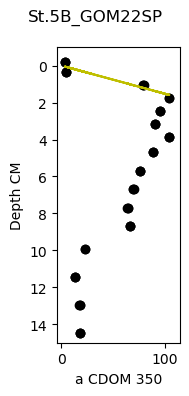

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.75  1.75  1.75]


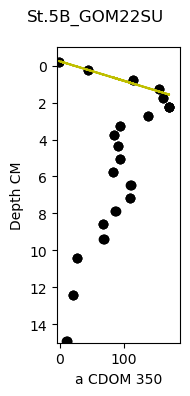

[0.35 0.35 0.35 1.05 1.05 1.05 1.75 1.75 1.75]


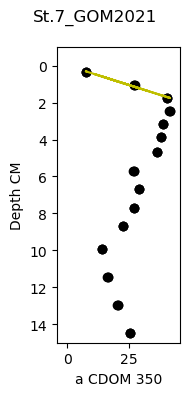

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


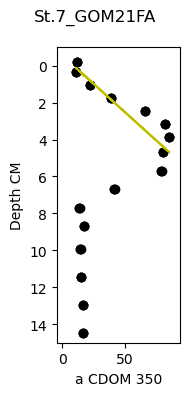

[-0.2  -0.2  -0.2  -0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05
  1.75  1.75  1.75  2.45  2.45  2.45  3.15  3.15  3.15  3.15  3.15  3.15]


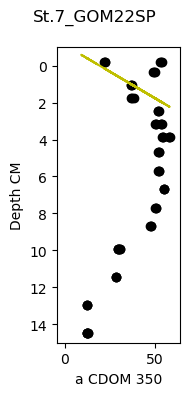

[0.25 0.25 0.25 0.75 0.75 0.75 1.25 1.25 1.25 1.75 1.75 1.75]


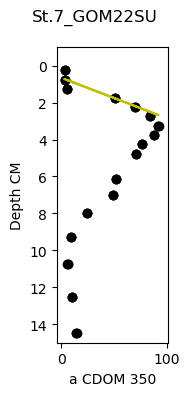

[-0.2  -0.2  -0.2   1.05  1.05  1.05]


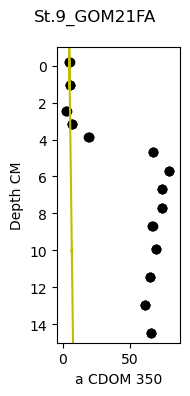

[-0.2  -0.2  -0.2   0.35  0.35  0.35  0.35  0.35  0.35  1.75  1.75  1.75]


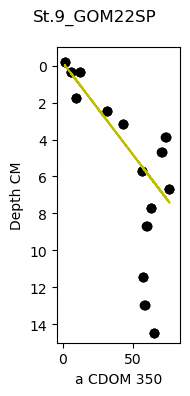

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.75  1.75  1.75]


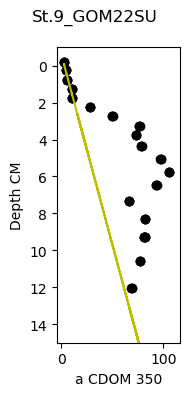

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


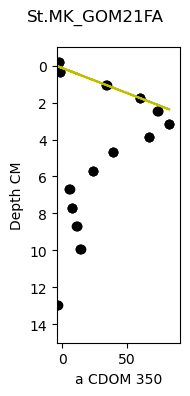

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


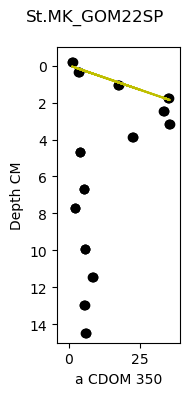

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.05  1.05  1.05
  1.75  1.75  1.75]


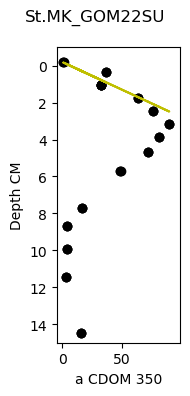

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\3285258102.py:140: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  slopes_cdom_pw['por_mean'].fillna(0.85, inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\3285258102.py:141: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,slope_350_pw,rsquared_350_pw,std_err_350_pw,flux_350_depth_pw,por_mean,por_sd,std_err_por,por_count,D_doc_low,D_doc_high,D_doc_mean,D_doc_sd,std_err_D_doc,por_SE,pw_flux_aCDOM350,pw_flux_aCDOM350_error,Lat,Lon,Stn,Camp
code,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,1238.910894,0.943316,107.373665,-0.5,0.890658,0.007569,0.003785,4.0,0.000021,0.000002,0.000006,3.916204e-07,3.914248e-10,0.003785,0.054189,0.004930,28.225724,-89.540904,St.11,GOM2021
St.11_GOM21FA,951.277391,0.683959,204.486149,-0.5,0.907891,0.011646,0.005823,4.0,0.000022,0.000002,0.000006,4.069218e-07,4.067185e-10,0.005823,0.044071,0.009759,28.209529,-89.591672,St.11,GOM21FA
St.11_GOM22SU,725.387386,0.202645,508.724297,-0.5,0.909593,0.005062,0.002531,4.0,0.000022,0.000002,0.000006,4.084484e-07,4.082444e-10,0.002531,0.033795,0.023797,28.202880,-89.581503,St.11,GOM22SU
St.12_GOM21FA,2553.367764,0.729114,492.162737,-0.5,0.834492,0.011730,0.005865,4.0,0.000018,0.000002,0.000005,3.437858e-07,3.436141e-10,0.005865,0.091859,0.018358,28.594249,-88.903741,St.12,GOM21FA
St.12_GOM22SU,18806.447359,0.999631,180.543787,-0.5,0.842464,0.021897,0.010948,4.0,0.000019,0.000002,0.000005,3.503854e-07,3.502103e-10,0.010948,0.696148,0.015778,28.593063,-88.878258,St.12,GOM22SU
St.13_GOM21FA,645.743680,0.472596,215.718322,-0.5,0.908008,0.004741,0.002371,4.0,0.000022,0.000002,0.000006,4.070267e-07,4.068233e-10,0.002371,0.029927,0.010078,28.524193,-89.610854,St.13,GOM21FA
St.13_GOM22SP,24496.817727,0.999565,255.514539,-0.5,0.881930,0.009893,0.004946,4.0,0.000021,0.000002,0.000006,3.839825e-07,3.837907e-10,0.004946,1.040286,0.016757,28.507026,-89.622720,St.13,GOM22SP
St.13_GOM22SU,1950.158458,0.956708,131.185026,-0.5,0.879924,0.020249,0.014318,2.0,0.000020,0.000002,0.000006,3.822380e-07,3.820470e-10,0.014318,0.082252,0.006877,28.524547,-89.597871,St.13,GOM22SU
St.14_GOM2021,14525.405349,0.944579,829.296202,-0.5,0.849480,0.020559,0.010279,4.0,0.000019,0.000002,0.000005,3.562457e-07,3.560677e-10,0.010279,0.551225,0.038179,28.726863,-89.601437,St.14,GOM2021


In [12]:
Frames = []

def cdom_flux_cal(code, depth1, depth2): 
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2, 4)) 
    sub = df_cdom[df_cdom['code'] == code]
    sub = sub.sort_values(by='Sample_depth')
    y = sub['Sample_depth']
    x = sub['a350']
    axs.scatter(x, y, c="black")
    yy = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel() 
    xx = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a350'].ravel()
    
    # Add subplot labels
    axs.set_xlabel('a CDOM 350')
    axs.set_ylabel('Depth CM')
    axs.set_ylim(15,-1)
    axs.set_xlim(df_cdom['a350'].min(),sub['a350'].max()*1.1)

    print(yy)
    
    if len(xx) > 2:
        # Add the slope value to the plot
        slope, intercept, r_value, p_value, std_err = stats.linregress(xx, yy)
        axs.plot(x, intercept + slope * x, c='y')        
        
        xx2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel()/ 1000 
        yy2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a350'].ravel() 
        slope, intercept, r_value, p_value, std_err = stats.linregress(xx2, yy2)
        
        slope = slope
        rsquared = r_value**2
        std_err = std_err 

        slope_std = std_err / np.sqrt(len(xx2)) 
    
    df_p = df_por.loc[df_por['code'] == code]
    df_por_data = df_p.loc[(df_p['depth'] < 2) & (df_p['depth'] > 0), 'porosity'].ravel() 
    por_mean = df_por_data.mean()
    por_std = df_por_data.std()
    std_err_por = por_std / np.sqrt(len(df_por_data)) 
    por_count = len(df_por_data)


    mw_1 = 100
    mw_2 = 2000

    Do = (1.1 * 1e-3) * (mw_1 ** -.81) 
    D_doc_a = Do / (por_mean * por_mean ** -3 ) 

    Do = (1.1 * 1e-3) * (mw_2 ** -.81) 
    D_doc_b = Do / (por_mean * por_mean ** -3 ) 
    
    mw = np.arange(1000, 2001, 1)

    Do = (1.1 * 1e-3) * (mw ** -.81) 
    Do_min = Do.min()
    Do_max = Do.max()
    
    D_doc = Do / (por_mean * por_mean ** -3 ) 

    stderr_D_doc = np.std(D_doc, ddof=1) / len(D_doc)
    D_doc_sd = np.std(D_doc) 

    mw_mean = 500
    Do = (1.1 * 1e-3) * (mw_mean ** -.81) 
    mean_D_doc = Do / (por_mean * por_mean ** -3 ) 

        
    dic = {'code':[code],
           'slope_350_pw':[slope],
           'rsquared_350_pw':[rsquared], 
           'std_err_350_pw':[std_err], 
           'flux_350_depth_pw': [depth1], 
           'por_mean': por_mean,
           'por_sd': por_std,
           'std_err_por': std_err_por,
           'por_count':por_count, 
           'D_doc_low':D_doc_a,
           'D_doc_high':D_doc_b, 
           'D_doc_mean':mean_D_doc, 
           'D_doc_sd': D_doc_sd,
           'std_err_D_doc':stderr_D_doc}
        
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    Frames.append(slopes)
        
    # Add subplot labels
    fig.suptitle(code)
    plt.tight_layout()
    fig.set_facecolor('w')
    plt.show()

codes = df_cdom['code'].unique()

cdom_flux_cal('St.11_GOM2021', -.5, 2)
cdom_flux_cal('St.11_GOM21FA', -.5, 2)
cdom_flux_cal('St.11_GOM22SU', -.5, 2)
cdom_flux_cal('St.12_GOM21FA', -.5, 2)
cdom_flux_cal('St.12_GOM22SU', -.5, 1)
cdom_flux_cal('St.13_GOM21FA', -.5, 2)
cdom_flux_cal('St.13_GOM22SP', -.5, 1)
cdom_flux_cal('St.13_GOM22SU', -.5, 2)
cdom_flux_cal('St.14_GOM2021', -.5, 2)
cdom_flux_cal('St.14_GOM21FA', -.5, 2)
cdom_flux_cal('St.14_GOM22SP', -.5, 2)
cdom_flux_cal('St.14_GOM22SU', -.5, 2)
cdom_flux_cal('St.15_GOM2021', -.5, 2)
cdom_flux_cal('St.15_GOM21FA', -.5, 2)
cdom_flux_cal('St.15_GOM22SP', -.5, 2)
cdom_flux_cal('St.15_GOM22SU', -.5, 2)
cdom_flux_cal('St.16_GOM2021', -.5, 2)
cdom_flux_cal('St.16_GOM21FA', -.5, 2)
cdom_flux_cal('St.16_GOM22SP', -.5, 2)
cdom_flux_cal('St.16_GOM22SU', -.5, 2)
cdom_flux_cal('St.2_GOM2021', -.5, 2)
cdom_flux_cal('St.2_GOM21FA', -.5, 2)
cdom_flux_cal('St.2_GOM22SP', -.5, 2)
cdom_flux_cal('St.2_GOM22SU', -.5, 2)
cdom_flux_cal('St.4_GOM21FA', -.5, 2)
cdom_flux_cal('St.4_GOM22SP', -.5, 2)
cdom_flux_cal('St.4_GOM22SU', -.5, 2)
cdom_flux_cal('St.5B_GOM21FA', -.5, 2)
cdom_flux_cal('St.5B_GOM22SP', -.5, 2)
cdom_flux_cal('St.5B_GOM22SU', -.5, 2)
cdom_flux_cal('St.7_GOM2021', -.5, 2)
cdom_flux_cal('St.7_GOM21FA', -.5, 2)
cdom_flux_cal('St.7_GOM22SP', -.5, 3.5)
cdom_flux_cal('St.7_GOM22SU', -.5, 2)
cdom_flux_cal('St.9_GOM21FA', -.5, 2)
cdom_flux_cal('St.9_GOM22SP', -.5, 2)
cdom_flux_cal('St.9_GOM22SU', -.5, 2)
cdom_flux_cal('St.MK_GOM21FA', -.5, 2)
cdom_flux_cal('St.MK_GOM22SP', -.5, 2)
cdom_flux_cal('St.MK_GOM22SU', -.5, 2)


slopes_cdom_pw = pd.concat(Frames, axis=0, ignore_index=False)

slopes_cdom_pw['por_mean'].fillna(0.85, inplace=True)
slopes_cdom_pw['por_sd'].fillna(0, inplace=True)
slopes_cdom_pw['por_SE'] = slopes_cdom_pw['por_sd'] / (np.sqrt(slopes_cdom_pw['por_count']))
slopes_cdom_pw['por_SE'].fillna(0, inplace=True)

slopes_cdom_pw["pw_flux_aCDOM350"] = slopes_cdom_pw["slope_350_pw"] * slopes_cdom_pw["por_mean"] * (slopes_cdom_pw["D_doc_mean"] / 10000 * (86400) )
slopes_cdom_pw["pw_flux_aCDOM350_error"] =  (slopes_cdom_pw["std_err_350_pw"] / slopes_cdom_pw["slope_350_pw"]) + (slopes_cdom_pw["por_SE"] / slopes_cdom_pw["por_mean"]) + (slopes_cdom_pw["std_err_D_doc"] / slopes_cdom_pw["D_doc_mean"] )
slopes_cdom_pw["pw_flux_aCDOM350_error"] = slopes_cdom_pw["pw_flux_aCDOM350_error"] * slopes_cdom_pw["pw_flux_aCDOM350"]

slopes_cdom_pw = pd.concat([slopes_cdom_pw, df_lat_lon], axis=1, join='outer')
slopes_cdom_pw['Stn'] = slopes_cdom_pw.index.str.split('_').str[0]
slopes_cdom_pw['Camp'] = slopes_cdom_pw.index.str.split('_').str[1]
slopes_cdom_pw = slopes_cdom_pw.dropna(subset=['pw_flux_aCDOM350'])

slopes_350_pw = slopes_cdom_pw 
slopes_350_pw

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\1238349706.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  yy = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\1238349706.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xx = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a320'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\1238349706.py:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xx2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].rave

[0.35 0.35 0.35 1.05 1.05 1.05 1.05 1.75 1.75 1.75]


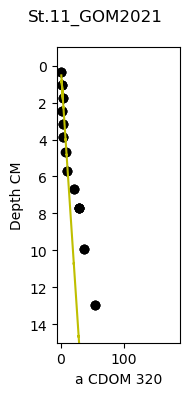

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


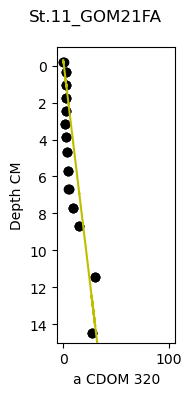

[-0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


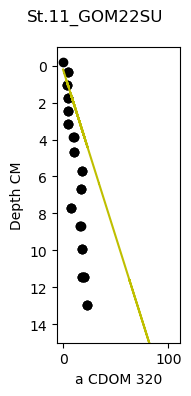

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


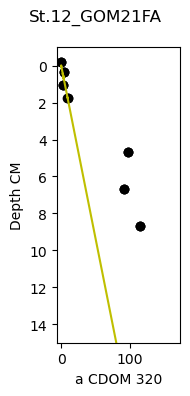

[-0.2  -0.2  -0.2   0.35  0.35  0.35]


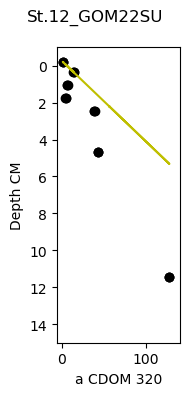

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


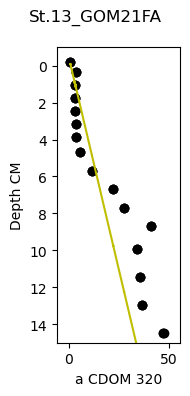

[-0.2  -0.2  -0.2   0.35  0.35  0.35]


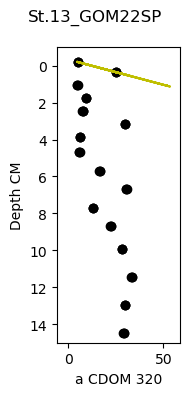

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


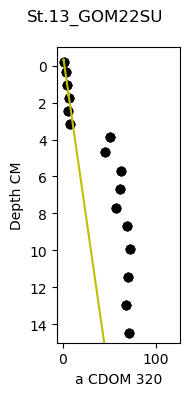

[-0.2  -0.2  -0.2  -0.2  -0.2   0.35  0.35  0.35  0.35  0.35  1.05  1.05
  1.05  1.05  1.05  1.75  1.75  1.75  1.75  1.75]


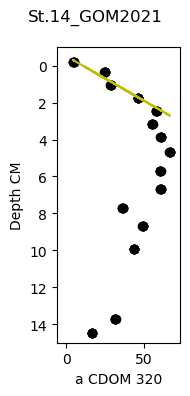

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


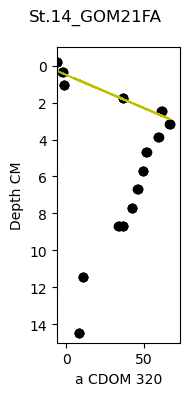

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75
  1.75  1.75  1.75]


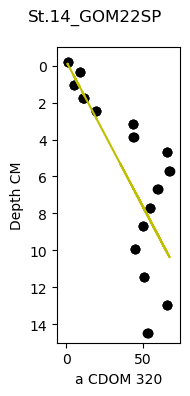

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


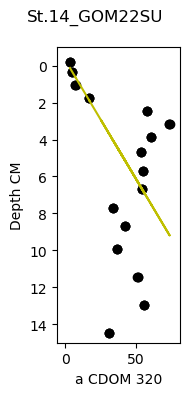

[0.35 1.05 1.75]


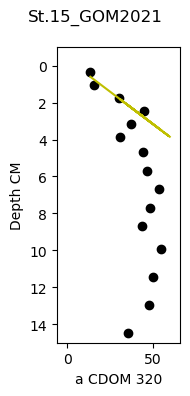

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.75  1.75  1.75]


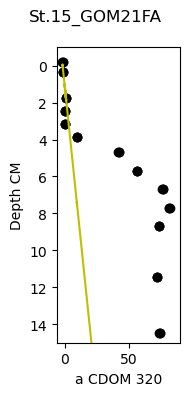

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


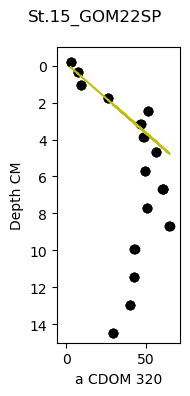

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


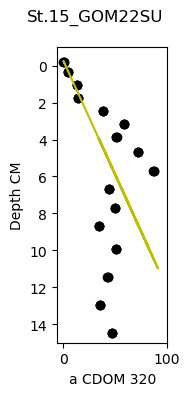

[-0.2  -0.2   0.35  1.05  1.75]


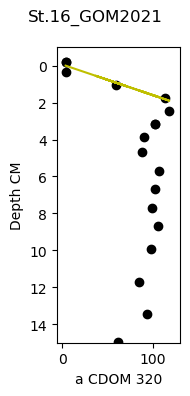

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


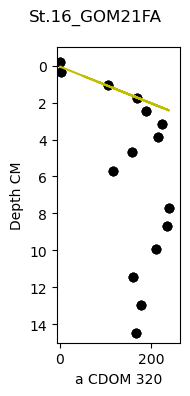

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


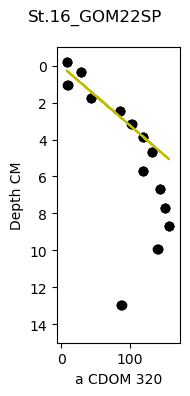

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


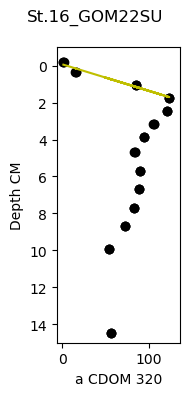

[0.35 1.05 1.75]


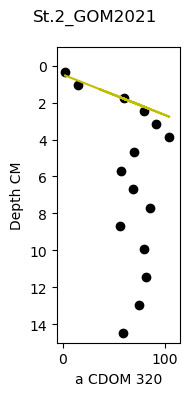

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


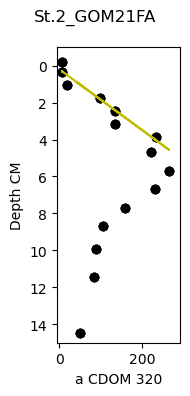

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


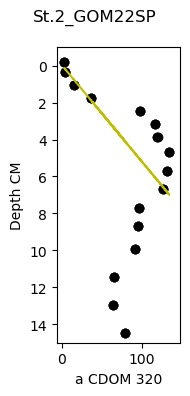

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


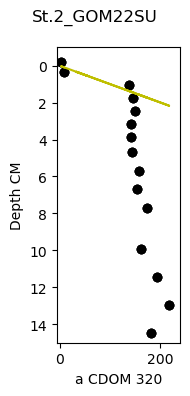

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


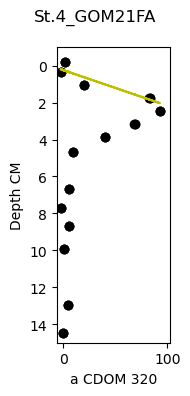

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


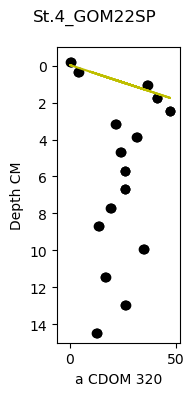

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.85  1.85  1.85]


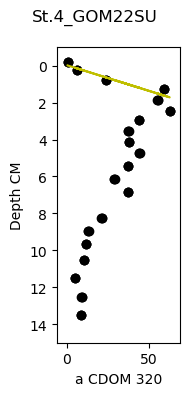

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


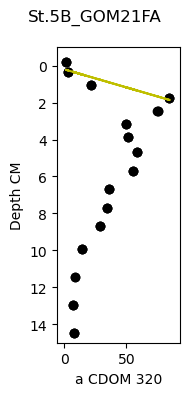

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75]


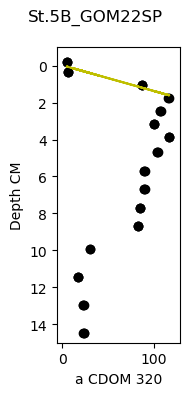

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.75  1.75  1.75]


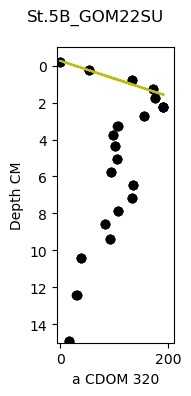

[0.35 0.35 0.35 1.05 1.05 1.05 1.75 1.75 1.75]


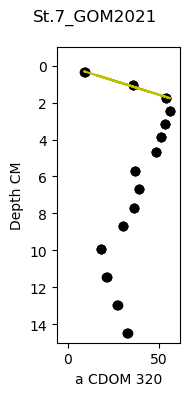

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


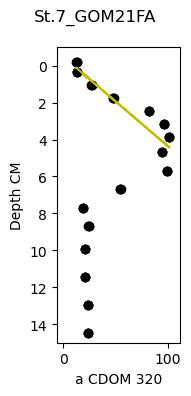

[-0.2  -0.2  -0.2  -0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05
  1.75  1.75  1.75  2.45  2.45  2.45]


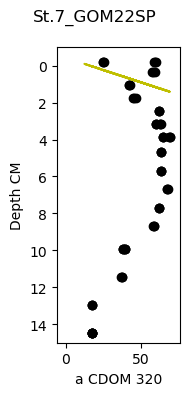

[0.25 0.25 0.25 0.75 0.75 0.75 1.25 1.25 1.25 1.75 1.75 1.75]


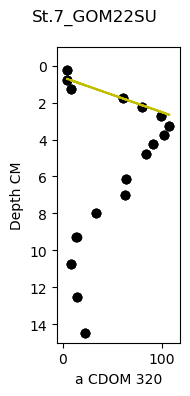

[-0.2  -0.2  -0.2   1.05  1.05  1.05]


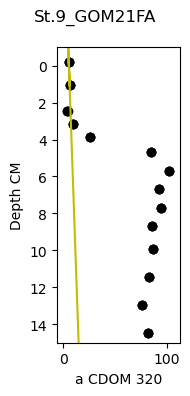

[-0.2  -0.2  -0.2   0.35  0.35  0.35  0.35  0.35  0.35  1.75  1.75  1.75]


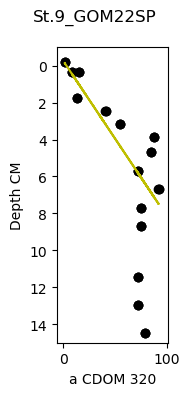

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.75  1.75  1.75]


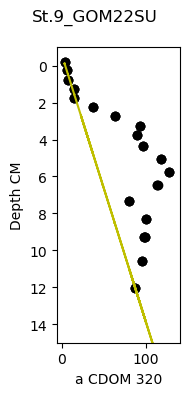

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


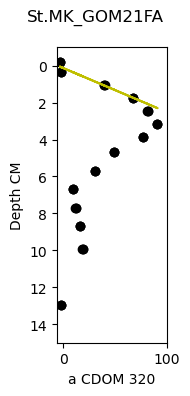

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


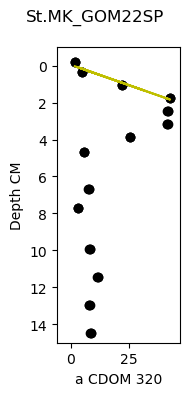

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.05  1.05  1.05
  1.75  1.75  1.75]


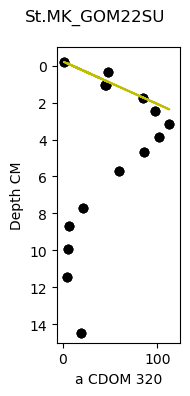

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\1238349706.py:141: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  slopes_cdom_pw['por_mean'].fillna(0.85, inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\1238349706.py:142: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,slope_320_pw,rsquared_320_pw,std_err_320_pw,flux_320_depth_pw,por_mean,por_sd,std_err_por,por_count,D_doc_low,D_doc_high,D_doc_mean,D_doc_sd,std_err_D_doc,por_SE,pw_flux_aCDOM320,pw_flux_aCDOM320_error,Lat,Lon,Stn,Camp
code,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,1765.860705,0.912647,193.152180,-0.5,0.890658,0.007569,0.003785,4.0,0.000021,0.000002,0.000006,3.916204e-07,3.914248e-10,0.003785,0.077238,0.008782,28.225724,-89.540904,St.11,GOM2021
St.11_GOM21FA,1228.175980,0.584225,327.642086,-0.5,0.907891,0.011646,0.005823,4.0,0.000022,0.000002,0.000006,4.069218e-07,4.067185e-10,0.005823,0.056899,0.015548,28.209529,-89.591672,St.11,GOM21FA
St.11_GOM22SU,930.065512,0.167968,731.856604,-0.5,0.909593,0.005062,0.002531,4.0,0.000022,0.000002,0.000006,4.084484e-07,4.082444e-10,0.002531,0.043331,0.034220,28.202880,-89.581503,St.11,GOM22SU
St.12_GOM21FA,3908.158459,0.729171,753.190556,-0.5,0.834492,0.011730,0.005865,4.0,0.000018,0.000002,0.000005,3.437858e-07,3.436141e-10,0.005865,0.140598,0.028094,28.594249,-88.903741,St.12,GOM21FA
St.12_GOM22SU,23024.478910,0.999827,151.534385,-0.5,0.842464,0.021897,0.010948,4.0,0.000019,0.000002,0.000005,3.503854e-07,3.502103e-10,0.010948,0.852285,0.016744,28.593063,-88.878258,St.12,GOM22SU
St.13_GOM21FA,944.635483,0.433251,341.656809,-0.5,0.908008,0.004741,0.002371,4.0,0.000022,0.000002,0.000006,4.070267e-07,4.068233e-10,0.002371,0.043780,0.015952,28.524193,-89.610854,St.13,GOM21FA
St.13_GOM22SP,36510.172087,0.999936,145.532052,-0.5,0.881930,0.009893,0.004946,4.0,0.000021,0.000002,0.000006,3.839825e-07,3.837907e-10,0.004946,1.550447,0.014983,28.507026,-89.622720,St.13,GOM22SP
St.13_GOM22SU,2720.369518,0.955533,185.577281,-0.5,0.879924,0.020249,0.014318,2.0,0.000020,0.000002,0.000006,3.822380e-07,3.820470e-10,0.014318,0.114737,0.009702,28.524547,-89.597871,St.13,GOM22SU
St.14_GOM2021,19207.929347,0.929504,1246.812637,-0.5,0.849480,0.020559,0.010279,4.0,0.000019,0.000002,0.000005,3.562457e-07,3.560677e-10,0.010279,0.728922,0.056186,28.726863,-89.601437,St.14,GOM2021


In [13]:
Frames = []

def cdom_flux_cal(code, depth1, depth2): 
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2, 4)) 
    sub = df_cdom[df_cdom['code'] == code]
    sub = sub.sort_values(by='Sample_depth')
    y = sub['Sample_depth']
    x = sub['a320']
    axs.scatter(x, y, c="black")
    yy = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel() 
    xx = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a320'].ravel()
    
    # Add subplot labels
    axs.set_xlabel('a CDOM 320')
    axs.set_ylabel('Depth CM')
    axs.set_ylim(15, -1)
    axs.set_xlim(df_cdom['a320'].min(), sub['a320'].max() * 1.1)

    print(yy)
    
    if len(xx) > 2:
        # Add the slope value to the plot
        slope, intercept, r_value, p_value, std_err = stats.linregress(xx, yy)
        axs.plot(x, intercept + slope * x, c='y')        
        
        xx2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel() / 1000 
        yy2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a320'].ravel() 
        slope, intercept, r_value, p_value, std_err = stats.linregress(xx2, yy2)
        
        slope = slope
        rsquared = r_value ** 2
        std_err = std_err 

        slope_std = std_err / np.sqrt(len(xx2)) 
    
    df_p = df_por.loc[df_por['code'] == code]
    df_por_data = df_p.loc[(df_p['depth'] < 2) & (df_p['depth'] > 0), 'porosity'].ravel() 
    por_mean = df_por_data.mean()
    por_std = df_por_data.std()
    std_err_por = por_std / np.sqrt(len(df_por_data)) 
    por_count = len(df_por_data)


    mw_1 = 100
    mw_2 = 2000

    Do = (1.1 * 1e-3) * (mw_1 ** -.81) 
    D_doc_a = Do / (por_mean * por_mean ** -3 ) 

    Do = (1.1 * 1e-3) * (mw_2 ** -.81) 
    D_doc_b = Do / (por_mean * por_mean ** -3 ) 
    
    mw = np.arange(1000, 2001, 1)

    Do = (1.1 * 1e-3) * (mw ** -.81) 
    Do_min = Do.min()
    Do_max = Do.max()
    
    D_doc = Do / (por_mean * por_mean ** -3 ) 

    stderr_D_doc = np.std(D_doc, ddof=1) / len(D_doc)
    D_doc_sd = np.std(D_doc) 

    mw_mean = 500
    Do = (1.1 * 1e-3) * (mw_mean ** -.81) 
    mean_D_doc = Do / (por_mean * por_mean ** -3 ) 

        
    dic = {'code': [code],
           'slope_320_pw': [slope],
           'rsquared_320_pw': [rsquared], 
           'std_err_320_pw': [std_err], 
           'flux_320_depth_pw': [depth1], 
           'por_mean': por_mean,
           'por_sd': por_std,
           'std_err_por': std_err_por,
           'por_count': por_count, 
           'D_doc_low': D_doc_a,
           'D_doc_high': D_doc_b, 
           'D_doc_mean': mean_D_doc, 
           'D_doc_sd': D_doc_sd,
           'std_err_D_doc': stderr_D_doc}
        
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    Frames.append(slopes)
        
    # Add subplot labels
    fig.suptitle(code)
    plt.tight_layout()
    fig.set_facecolor('w')
    plt.show()

codes = df_cdom['code'].unique()


cdom_flux_cal('St.11_GOM2021', -.5, 2)
cdom_flux_cal('St.11_GOM21FA', -.5, 2)
cdom_flux_cal('St.11_GOM22SU', -.5, 2)
cdom_flux_cal('St.12_GOM21FA', -.5, 2)
cdom_flux_cal('St.12_GOM22SU', -.5, 1)
cdom_flux_cal('St.13_GOM21FA', -.5, 2)
cdom_flux_cal('St.13_GOM22SP', -.5, 1)
cdom_flux_cal('St.13_GOM22SU', -.5, 2)
cdom_flux_cal('St.14_GOM2021', -.5, 2)
cdom_flux_cal('St.14_GOM21FA', -.5, 2)
cdom_flux_cal('St.14_GOM22SP', -.5, 2)
cdom_flux_cal('St.14_GOM22SU', -.5, 2)
cdom_flux_cal('St.15_GOM2021', -.5, 2)
cdom_flux_cal('St.15_GOM21FA', -.5, 2)
cdom_flux_cal('St.15_GOM22SP', -.5, 2)
cdom_flux_cal('St.15_GOM22SU', -.5, 2)
cdom_flux_cal('St.16_GOM2021', -.5, 2)
cdom_flux_cal('St.16_GOM21FA', -.5, 2)
cdom_flux_cal('St.16_GOM22SP', -.5, 2)
cdom_flux_cal('St.16_GOM22SU', -.5, 2)
cdom_flux_cal('St.2_GOM2021', -.5, 2)
cdom_flux_cal('St.2_GOM21FA', -.5, 2)
cdom_flux_cal('St.2_GOM22SP', -.5, 2)
cdom_flux_cal('St.2_GOM22SU', -.5, 2)
cdom_flux_cal('St.4_GOM21FA', -.5, 2)
cdom_flux_cal('St.4_GOM22SP', -.5, 2)
cdom_flux_cal('St.4_GOM22SU', -.5, 2)
cdom_flux_cal('St.5B_GOM21FA', -.5, 2)
cdom_flux_cal('St.5B_GOM22SP', -.5, 2)
cdom_flux_cal('St.5B_GOM22SU', -.5, 2)
cdom_flux_cal('St.7_GOM2021', -.5, 2)
cdom_flux_cal('St.7_GOM21FA', -.5, 2)
cdom_flux_cal('St.7_GOM22SP', -.5, 3)
cdom_flux_cal('St.7_GOM22SU', -.5, 2)
cdom_flux_cal('St.9_GOM21FA', -.5, 2)
cdom_flux_cal('St.9_GOM22SP', -.5, 2)
cdom_flux_cal('St.9_GOM22SU', -.5, 2)
cdom_flux_cal('St.MK_GOM21FA', -.5, 2)
cdom_flux_cal('St.MK_GOM22SP', -.5, 2)
cdom_flux_cal('St.MK_GOM22SU', -.5, 2)


slopes_cdom_pw = pd.concat(Frames, axis=0, ignore_index=False)

slopes_cdom_pw['por_mean'].fillna(0.85, inplace=True)
slopes_cdom_pw['por_sd'].fillna(0, inplace=True)
slopes_cdom_pw['por_SE'] = slopes_cdom_pw['por_sd'] / (np.sqrt(slopes_cdom_pw['por_count']))
slopes_cdom_pw['por_SE'].fillna(0, inplace=True)

slopes_cdom_pw["pw_flux_aCDOM320"] = slopes_cdom_pw["slope_320_pw"] * slopes_cdom_pw["por_mean"] * (slopes_cdom_pw["D_doc_mean"] / 10000 * (86400) )
slopes_cdom_pw["pw_flux_aCDOM320_error"] =  (slopes_cdom_pw["std_err_320_pw"] / slopes_cdom_pw["slope_320_pw"]) + (slopes_cdom_pw["por_SE"] / slopes_cdom_pw["por_mean"]) + (slopes_cdom_pw["std_err_D_doc"] / slopes_cdom_pw["D_doc_mean"] )
slopes_cdom_pw["pw_flux_aCDOM320_error"] = slopes_cdom_pw["pw_flux_aCDOM320_error"] * slopes_cdom_pw["pw_flux_aCDOM320"]

slopes_cdom_pw = pd.concat([slopes_cdom_pw, df_lat_lon], axis=1, join='outer')
slopes_cdom_pw['Stn'] = slopes_cdom_pw.index.str.split('_').str[0]
slopes_cdom_pw['Camp'] = slopes_cdom_pw.index.str.split('_').str[1]
slopes_cdom_pw = slopes_cdom_pw.dropna(subset=['pw_flux_aCDOM320'])

slopes_320_pw = slopes_cdom_pw 
slopes_320_pw




C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\304015341.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  yy = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\304015341.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xx = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a412'].ravel()
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\304015341.py:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xx2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel()

[0.35 0.35 0.35 1.05 1.05 1.05 1.05 1.75 1.75 1.75]


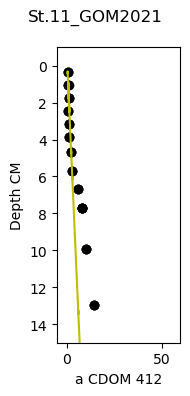

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


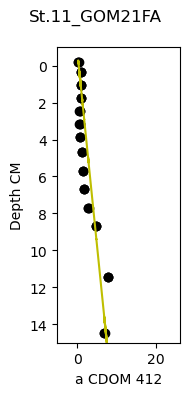

[-0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


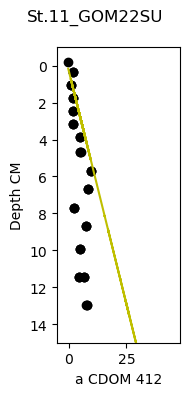

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


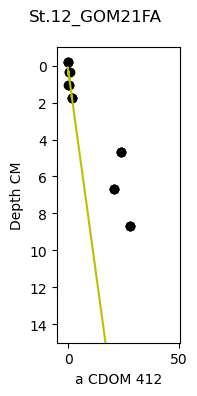

[-0.2  -0.2  -0.2   0.35  0.35  0.35]


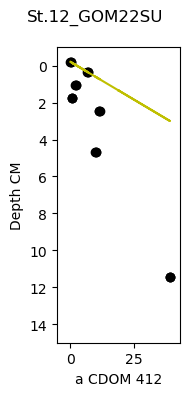

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


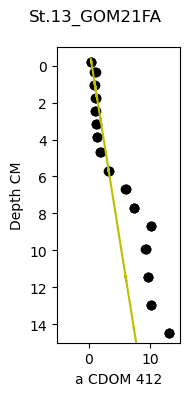

[-0.2  -0.2  -0.2   0.35  0.35  0.35]


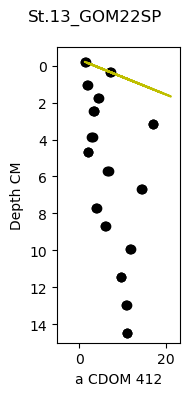

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


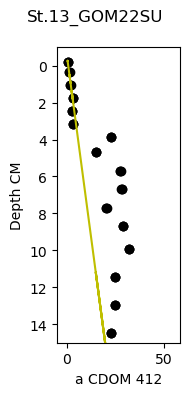

[-0.2  -0.2  -0.2  -0.2  -0.2   0.35  0.35  0.35  0.35  0.35  1.05  1.05
  1.05  1.05  1.05  1.75  1.75  1.75  1.75  1.75]


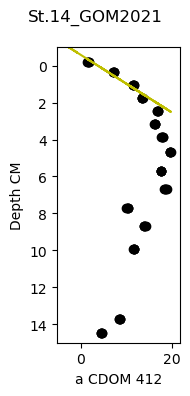

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


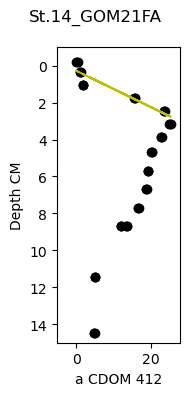

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75
  1.75  1.75  1.75]


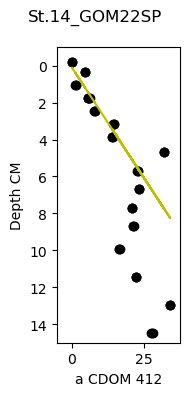

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


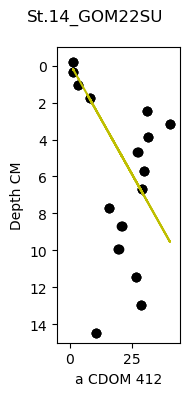

[0.35 1.05 1.75]


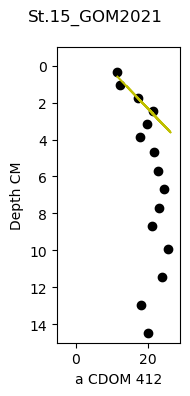

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.75  1.75  1.75]


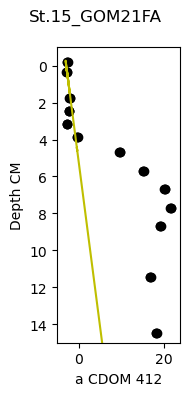

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


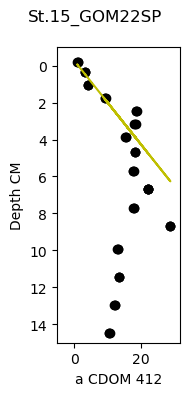

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


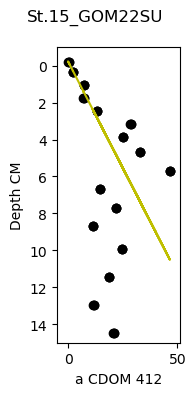

[-0.2  -0.2   0.35  1.05  1.75]


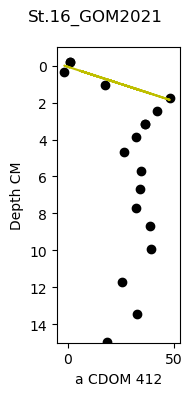

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


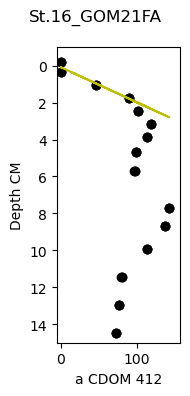

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


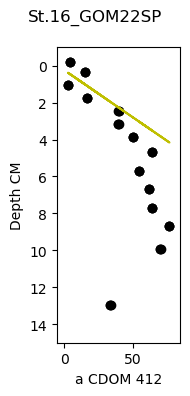

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


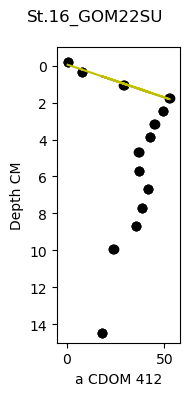

[0.35 1.05 1.75]


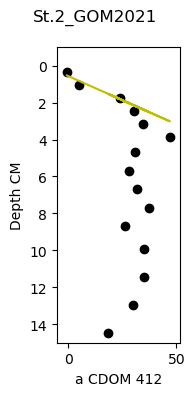

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


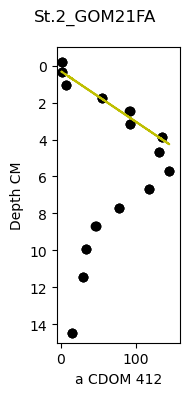

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


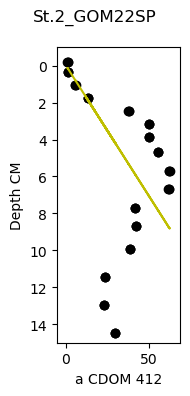

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


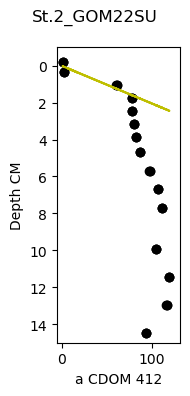

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


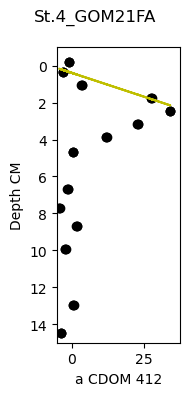

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


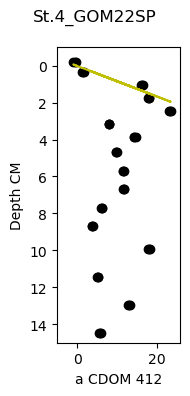

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.85  1.85  1.85]


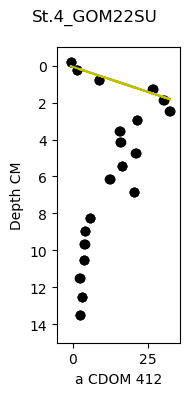

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


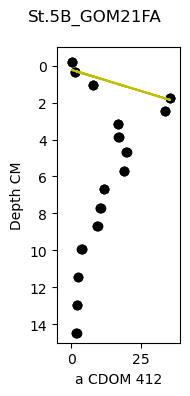

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75]


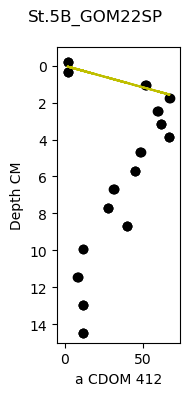

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.75  1.75  1.75]


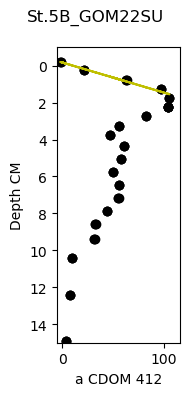

[0.35 0.35 0.35 1.05 1.05 1.05 1.75 1.75 1.75]


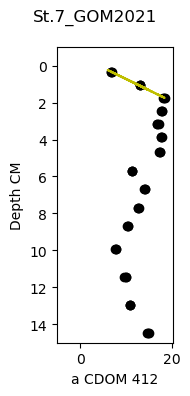

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


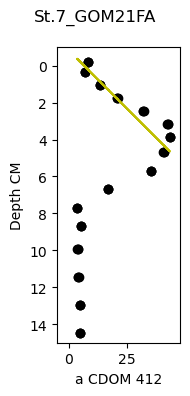

[0.35 0.35 0.35 1.05 1.05 1.05 1.75 1.75 1.75 2.45 2.45 2.45 3.15 3.15
 3.15 3.15 3.15 3.15 3.85 3.85 3.85 3.85 3.85 3.85]


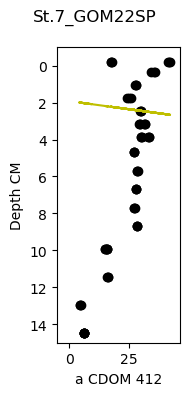

[0.25 0.25 0.25 0.75 0.75 0.75 1.25 1.25 1.25 1.75 1.75 1.75]


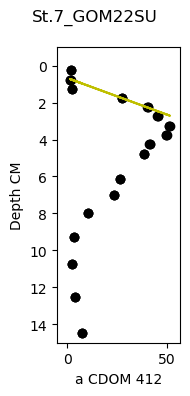

[-0.2  -0.2  -0.2   1.05  1.05  1.05  2.45  2.45  2.45  3.15  3.15  3.15
  3.85  3.85  3.85]


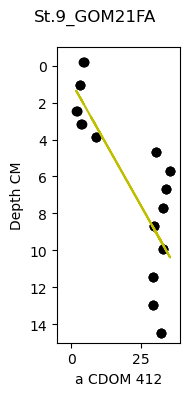

[-0.2  -0.2  -0.2   0.35  0.35  0.35  0.35  0.35  0.35  1.75  1.75  1.75]


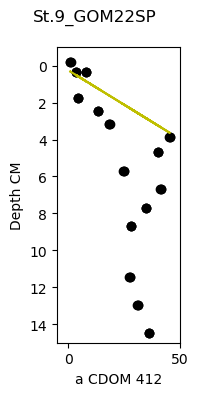

[-0.2  -0.2  -0.2   0.25  0.25  0.25  0.75  0.75  0.75  1.25  1.25  1.25
  1.75  1.75  1.75]


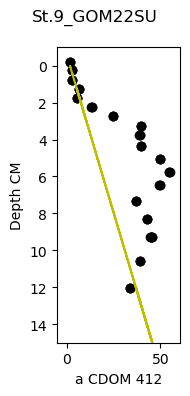

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


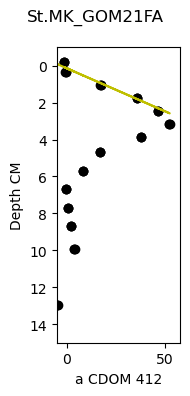

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.75  1.75  1.75]


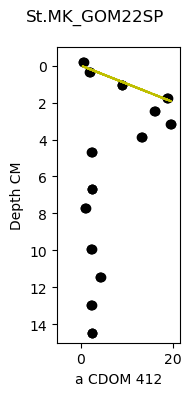

[-0.2  -0.2  -0.2   0.35  0.35  0.35  1.05  1.05  1.05  1.05  1.05  1.05
  1.75  1.75  1.75]


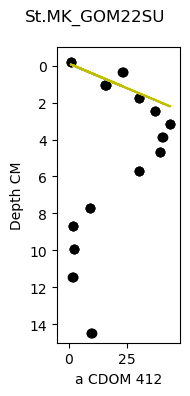

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\304015341.py:139: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  slopes_cdom_pw['por_mean'].fillna(0.85, inplace=True)
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_11204\304015341.py:140: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



,slope_412_pw,rsquared_412_pw,std_err_412_pw,flux_412_depth_pw,por_mean,por_sd,std_err_por,por_count,D_doc_low,D_doc_high,D_doc_mean,D_doc_sd,std_err_D_doc,por_SE,pw_flux_aCDOM412,pw_flux_aCDOM412_error,Lat,Lon,Stn,Camp
code,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,371.013111,0.861829,52.522095,-0.5,0.890658,0.007569,0.003785,4.0,0.000021,0.000002,0.000006,3.916204e-07,3.914248e-10,0.003785,0.016228,0.002367,28.225724,-89.540904,St.11,GOM2021
St.11_GOM21FA,259.247416,0.541962,75.366893,-0.5,0.907891,0.011646,0.005823,4.0,0.000022,0.000002,0.000006,4.069218e-07,4.067185e-10,0.005823,0.012010,0.003569,28.209529,-89.591672,St.11,GOM21FA
St.11_GOM22SU,441.971315,0.222830,291.823843,-0.5,0.909593,0.005062,0.002531,4.0,0.000022,0.000002,0.000006,4.084484e-07,4.082444e-10,0.002531,0.020591,0.013654,28.202880,-89.581503,St.11,GOM22SU
St.12_GOM21FA,775.186477,0.676786,169.404712,-0.5,0.834492,0.011730,0.005865,4.0,0.000018,0.000002,0.000005,3.437858e-07,3.436141e-10,0.005865,0.027888,0.006292,28.594249,-88.903741,St.12,GOM21FA
St.12_GOM22SU,12224.677872,0.998721,218.753669,-0.5,0.842464,0.021897,0.010948,4.0,0.000019,0.000002,0.000005,3.503854e-07,3.502103e-10,0.010948,0.452514,0.014009,28.593063,-88.878258,St.12,GOM22SU
St.13_GOM21FA,306.074078,0.639963,72.597619,-0.5,0.908008,0.004741,0.002371,4.0,0.000022,0.000002,0.000006,4.070267e-07,4.068233e-10,0.002371,0.014185,0.003403,28.524193,-89.610854,St.13,GOM21FA
St.13_GOM22SP,10581.378118,0.999455,123.551610,-0.5,0.881930,0.009893,0.004946,4.0,0.000021,0.000002,0.000006,3.839825e-07,3.837907e-10,0.004946,0.449351,0.007798,28.507026,-89.622720,St.13,GOM22SP
St.13_GOM22SU,1237.798409,0.974506,63.311083,-0.5,0.879924,0.020249,0.014318,2.0,0.000020,0.000002,0.000006,3.822380e-07,3.820470e-10,0.014318,0.052207,0.003523,28.524547,-89.597871,St.13,GOM22SU
St.14_GOM2021,5998.404896,0.938402,362.232729,-0.5,0.849480,0.020559,0.010279,4.0,0.000019,0.000002,0.000005,3.562457e-07,3.560677e-10,0.010279,0.227633,0.016517,28.726863,-89.601437,St.14,GOM2021


In [14]:
Frames = []

def cdom_flux_cal(code, depth1, depth2): 
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(2, 4)) 
    sub = df_cdom[df_cdom['code'] == code]
    sub = sub.sort_values(by='Sample_depth')
    y = sub['Sample_depth']
    x = sub['a412']
    axs.scatter(x, y, c="black")
    yy = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel() 
    xx = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a412'].ravel()
    
    # Add subplot labels
    axs.set_xlabel('a CDOM 412')
    axs.set_ylabel('Depth CM')
    axs.set_ylim(15, -1)
    axs.set_xlim(df_cdom['a412'].min(), sub['a412'].max() * 1.1)

    print(yy)
    
    if len(xx) > 2:
        # Add the slope value to the plot
        slope, intercept, r_value, p_value, std_err = stats.linregress(xx, yy)
        axs.plot(x, intercept + slope * x, c='y')        
        
        xx2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'Sample_depth'].ravel() / 1000 
        yy2 = sub.loc[(sub['Sample_depth'] > depth1) & (sub['Sample_depth'] < depth2), 'a412'].ravel() 
        slope, intercept, r_value, p_value, std_err = stats.linregress(xx2, yy2)
        
        slope = slope
        rsquared = r_value ** 2
        std_err = std_err 

        slope_std = std_err / np.sqrt(len(xx2)) 
    
    df_p = df_por.loc[df_por['code'] == code]
    df_por_data = df_p.loc[(df_p['depth'] < 2) & (df_p['depth'] > 0), 'porosity'].ravel() 
    por_mean = df_por_data.mean()
    por_std = df_por_data.std()
    std_err_por = por_std / np.sqrt(len(df_por_data)) 
    por_count = len(df_por_data)


    mw_1 = 100
    mw_2 = 2000

    Do = (1.1 * 1e-3) * (mw_1 ** -.81) 
    D_doc_a = Do / (por_mean * por_mean ** -3 ) 

    Do = (1.1 * 1e-3) * (mw_2 ** -.81) 
    D_doc_b = Do / (por_mean * por_mean ** -3 ) 
    
    mw = np.arange(1000, 2001, 1)

    Do = (1.1 * 1e-3) * (mw ** -.81) 
    Do_min = Do.min()
    Do_max = Do.max()
    
    D_doc = Do / (por_mean * por_mean ** -3 ) 

    stderr_D_doc = np.std(D_doc, ddof=1) / len(D_doc)
    D_doc_sd = np.std(D_doc) 

    mw_mean = 500
    Do = (1.1 * 1e-3) * (mw_mean ** -.81) 
    mean_D_doc = Do / (por_mean * por_mean ** -3 ) 

        
    dic = {'code': [code],
           'slope_412_pw': [slope],
           'rsquared_412_pw': [rsquared], 
           'std_err_412_pw': [std_err], 
           'flux_412_depth_pw': [depth1], 
           'por_mean': por_mean,
           'por_sd': por_std,
           'std_err_por': std_err_por,
           'por_count': por_count, 
           'D_doc_low': D_doc_a,
           'D_doc_high': D_doc_b, 
           'D_doc_mean': mean_D_doc, 
           'D_doc_sd': D_doc_sd,
           'std_err_D_doc': stderr_D_doc}
        
    slopes = pd.DataFrame(dic)
    slopes = slopes.set_index('code', drop=True)
    Frames.append(slopes)
        
    # Add subplot labels
    fig.suptitle(code)
    plt.tight_layout()
    fig.set_facecolor('w')
    plt.show()

codes = df_cdom['code'].unique()

cdom_flux_cal('St.11_GOM2021', -.5, 2)
cdom_flux_cal('St.11_GOM21FA', -.5, 2)
cdom_flux_cal('St.11_GOM22SU', -.5, 2)
cdom_flux_cal('St.12_GOM21FA', -.5, 2)
cdom_flux_cal('St.12_GOM22SU', -.5, 1)
cdom_flux_cal('St.13_GOM21FA', -.5, 2)
cdom_flux_cal('St.13_GOM22SP', -.5, 1)
cdom_flux_cal('St.13_GOM22SU', -.5, 2)
cdom_flux_cal('St.14_GOM2021', -.5, 2)
cdom_flux_cal('St.14_GOM21FA', -.5, 2)
cdom_flux_cal('St.14_GOM22SP', -.5, 2)
cdom_flux_cal('St.14_GOM22SU', -.5, 2)
cdom_flux_cal('St.15_GOM2021', -.5, 2)
cdom_flux_cal('St.15_GOM21FA', -.5, 2)
cdom_flux_cal('St.15_GOM22SP', -.5, 2)
cdom_flux_cal('St.15_GOM22SU', -.5, 2)
cdom_flux_cal('St.16_GOM2021', -.5, 2)
cdom_flux_cal('St.16_GOM21FA', -.5, 2)
cdom_flux_cal('St.16_GOM22SP', -.5, 2)
cdom_flux_cal('St.16_GOM22SU', -.5, 2)
cdom_flux_cal('St.2_GOM2021', -.5, 2)
cdom_flux_cal('St.2_GOM21FA', -.5, 2)
cdom_flux_cal('St.2_GOM22SP', -.5, 2)
cdom_flux_cal('St.2_GOM22SU', -.5, 2)
cdom_flux_cal('St.4_GOM21FA', -.5, 2)
cdom_flux_cal('St.4_GOM22SP', -.5, 2)
cdom_flux_cal('St.4_GOM22SU', -.5, 2)
cdom_flux_cal('St.5B_GOM21FA', -.5, 2)
cdom_flux_cal('St.5B_GOM22SP', -.5, 2)
cdom_flux_cal('St.5B_GOM22SU', -.5, 2)
cdom_flux_cal('St.7_GOM2021', -.5, 2)
cdom_flux_cal('St.7_GOM21FA', -.5, 2)
cdom_flux_cal('St.7_GOM22SP', 0, 4)
cdom_flux_cal('St.7_GOM22SU', -.5, 2)
cdom_flux_cal('St.9_GOM21FA', -.5, 4)
cdom_flux_cal('St.9_GOM22SP', -.5, 2)
cdom_flux_cal('St.9_GOM22SU', -.5, 2)
cdom_flux_cal('St.MK_GOM21FA', -.5, 2)
cdom_flux_cal('St.MK_GOM22SP', -.5, 2)
cdom_flux_cal('St.MK_GOM22SU', -.5, 2)

slopes_cdom_pw = pd.concat(Frames, axis=0, ignore_index=False)

slopes_cdom_pw['por_mean'].fillna(0.85, inplace=True)
slopes_cdom_pw['por_sd'].fillna(0, inplace=True)
slopes_cdom_pw['por_SE'] = slopes_cdom_pw['por_sd'] / (np.sqrt(slopes_cdom_pw['por_count']))
slopes_cdom_pw['por_SE'].fillna(0, inplace=True)

slopes_cdom_pw["pw_flux_aCDOM412"] = slopes_cdom_pw["slope_412_pw"] * slopes_cdom_pw["por_mean"] * (slopes_cdom_pw["D_doc_mean"] / 10000 * (86400) )
slopes_cdom_pw["pw_flux_aCDOM412_error"] =  (slopes_cdom_pw["std_err_412_pw"] / slopes_cdom_pw["slope_412_pw"]) + (slopes_cdom_pw["por_SE"] / slopes_cdom_pw["por_mean"]) + (slopes_cdom_pw["std_err_D_doc"] / slopes_cdom_pw["D_doc_mean"] )
slopes_cdom_pw["pw_flux_aCDOM412_error"] = slopes_cdom_pw["pw_flux_aCDOM412_error"] * slopes_cdom_pw["pw_flux_aCDOM412"]

slopes_cdom_pw = pd.concat([slopes_cdom_pw, df_lat_lon], axis=1, join='outer')
slopes_cdom_pw['Stn'] = slopes_cdom_pw.index.str.split('_').str[0]
slopes_cdom_pw['Camp'] = slopes_cdom_pw.index.str.split('_').str[1]
slopes_cdom_pw = slopes_cdom_pw.dropna(subset=['pw_flux_aCDOM412'])

slopes_412_pw = slopes_cdom_pw 
slopes_412_pw

In [15]:
slopes_320_pw.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_320.csv')
slopes_320_pw

,slope_320_pw,rsquared_320_pw,std_err_320_pw,flux_320_depth_pw,por_mean,por_sd,std_err_por,por_count,D_doc_low,D_doc_high,D_doc_mean,D_doc_sd,std_err_D_doc,por_SE,pw_flux_aCDOM320,pw_flux_aCDOM320_error,Lat,Lon,Stn,Camp
code,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,1765.860705,0.912647,193.152180,-0.5,0.890658,0.007569,0.003785,4.0,0.000021,0.000002,0.000006,3.916204e-07,3.914248e-10,0.003785,0.077238,0.008782,28.225724,-89.540904,St.11,GOM2021
St.11_GOM21FA,1228.175980,0.584225,327.642086,-0.5,0.907891,0.011646,0.005823,4.0,0.000022,0.000002,0.000006,4.069218e-07,4.067185e-10,0.005823,0.056899,0.015548,28.209529,-89.591672,St.11,GOM21FA
St.11_GOM22SU,930.065512,0.167968,731.856604,-0.5,0.909593,0.005062,0.002531,4.0,0.000022,0.000002,0.000006,4.084484e-07,4.082444e-10,0.002531,0.043331,0.034220,28.202880,-89.581503,St.11,GOM22SU
St.12_GOM21FA,3908.158459,0.729171,753.190556,-0.5,0.834492,0.011730,0.005865,4.0,0.000018,0.000002,0.000005,3.437858e-07,3.436141e-10,0.005865,0.140598,0.028094,28.594249,-88.903741,St.12,GOM21FA
St.12_GOM22SU,23024.478910,0.999827,151.534385,-0.5,0.842464,0.021897,0.010948,4.0,0.000019,0.000002,0.000005,3.503854e-07,3.502103e-10,0.010948,0.852285,0.016744,28.593063,-88.878258,St.12,GOM22SU
St.13_GOM21FA,944.635483,0.433251,341.656809,-0.5,0.908008,0.004741,0.002371,4.0,0.000022,0.000002,0.000006,4.070267e-07,4.068233e-10,0.002371,0.043780,0.015952,28.524193,-89.610854,St.13,GOM21FA
St.13_GOM22SP,36510.172087,0.999936,145.532052,-0.5,0.881930,0.009893,0.004946,4.0,0.000021,0.000002,0.000006,3.839825e-07,3.837907e-10,0.004946,1.550447,0.014983,28.507026,-89.622720,St.13,GOM22SP
St.13_GOM22SU,2720.369518,0.955533,185.577281,-0.5,0.879924,0.020249,0.014318,2.0,0.000020,0.000002,0.000006,3.822380e-07,3.820470e-10,0.014318,0.114737,0.009702,28.524547,-89.597871,St.13,GOM22SU
St.14_GOM2021,19207.929347,0.929504,1246.812637,-0.5,0.849480,0.020559,0.010279,4.0,0.000019,0.000002,0.000005,3.562457e-07,3.560677e-10,0.010279,0.728922,0.056186,28.726863,-89.601437,St.14,GOM2021


In [16]:
slopes_350_pw.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_350.csv')
slopes_350_pw

,slope_350_pw,rsquared_350_pw,std_err_350_pw,flux_350_depth_pw,por_mean,por_sd,std_err_por,por_count,D_doc_low,D_doc_high,D_doc_mean,D_doc_sd,std_err_D_doc,por_SE,pw_flux_aCDOM350,pw_flux_aCDOM350_error,Lat,Lon,Stn,Camp
code,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,1238.910894,0.943316,107.373665,-0.5,0.890658,0.007569,0.003785,4.0,0.000021,0.000002,0.000006,3.916204e-07,3.914248e-10,0.003785,0.054189,0.004930,28.225724,-89.540904,St.11,GOM2021
St.11_GOM21FA,951.277391,0.683959,204.486149,-0.5,0.907891,0.011646,0.005823,4.0,0.000022,0.000002,0.000006,4.069218e-07,4.067185e-10,0.005823,0.044071,0.009759,28.209529,-89.591672,St.11,GOM21FA
St.11_GOM22SU,725.387386,0.202645,508.724297,-0.5,0.909593,0.005062,0.002531,4.0,0.000022,0.000002,0.000006,4.084484e-07,4.082444e-10,0.002531,0.033795,0.023797,28.202880,-89.581503,St.11,GOM22SU
St.12_GOM21FA,2553.367764,0.729114,492.162737,-0.5,0.834492,0.011730,0.005865,4.0,0.000018,0.000002,0.000005,3.437858e-07,3.436141e-10,0.005865,0.091859,0.018358,28.594249,-88.903741,St.12,GOM21FA
St.12_GOM22SU,18806.447359,0.999631,180.543787,-0.5,0.842464,0.021897,0.010948,4.0,0.000019,0.000002,0.000005,3.503854e-07,3.502103e-10,0.010948,0.696148,0.015778,28.593063,-88.878258,St.12,GOM22SU
St.13_GOM21FA,645.743680,0.472596,215.718322,-0.5,0.908008,0.004741,0.002371,4.0,0.000022,0.000002,0.000006,4.070267e-07,4.068233e-10,0.002371,0.029927,0.010078,28.524193,-89.610854,St.13,GOM21FA
St.13_GOM22SP,24496.817727,0.999565,255.514539,-0.5,0.881930,0.009893,0.004946,4.0,0.000021,0.000002,0.000006,3.839825e-07,3.837907e-10,0.004946,1.040286,0.016757,28.507026,-89.622720,St.13,GOM22SP
St.13_GOM22SU,1950.158458,0.956708,131.185026,-0.5,0.879924,0.020249,0.014318,2.0,0.000020,0.000002,0.000006,3.822380e-07,3.820470e-10,0.014318,0.082252,0.006877,28.524547,-89.597871,St.13,GOM22SU
St.14_GOM2021,14525.405349,0.944579,829.296202,-0.5,0.849480,0.020559,0.010279,4.0,0.000019,0.000002,0.000005,3.562457e-07,3.560677e-10,0.010279,0.551225,0.038179,28.726863,-89.601437,St.14,GOM2021


In [17]:
slopes_412_pw.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_412.csv')
slopes_412_pw

,slope_412_pw,rsquared_412_pw,std_err_412_pw,flux_412_depth_pw,por_mean,por_sd,std_err_por,por_count,D_doc_low,D_doc_high,D_doc_mean,D_doc_sd,std_err_D_doc,por_SE,pw_flux_aCDOM412,pw_flux_aCDOM412_error,Lat,Lon,Stn,Camp
code,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,371.013111,0.861829,52.522095,-0.5,0.890658,0.007569,0.003785,4.0,0.000021,0.000002,0.000006,3.916204e-07,3.914248e-10,0.003785,0.016228,0.002367,28.225724,-89.540904,St.11,GOM2021
St.11_GOM21FA,259.247416,0.541962,75.366893,-0.5,0.907891,0.011646,0.005823,4.0,0.000022,0.000002,0.000006,4.069218e-07,4.067185e-10,0.005823,0.012010,0.003569,28.209529,-89.591672,St.11,GOM21FA
St.11_GOM22SU,441.971315,0.222830,291.823843,-0.5,0.909593,0.005062,0.002531,4.0,0.000022,0.000002,0.000006,4.084484e-07,4.082444e-10,0.002531,0.020591,0.013654,28.202880,-89.581503,St.11,GOM22SU
St.12_GOM21FA,775.186477,0.676786,169.404712,-0.5,0.834492,0.011730,0.005865,4.0,0.000018,0.000002,0.000005,3.437858e-07,3.436141e-10,0.005865,0.027888,0.006292,28.594249,-88.903741,St.12,GOM21FA
St.12_GOM22SU,12224.677872,0.998721,218.753669,-0.5,0.842464,0.021897,0.010948,4.0,0.000019,0.000002,0.000005,3.503854e-07,3.502103e-10,0.010948,0.452514,0.014009,28.593063,-88.878258,St.12,GOM22SU
St.13_GOM21FA,306.074078,0.639963,72.597619,-0.5,0.908008,0.004741,0.002371,4.0,0.000022,0.000002,0.000006,4.070267e-07,4.068233e-10,0.002371,0.014185,0.003403,28.524193,-89.610854,St.13,GOM21FA
St.13_GOM22SP,10581.378118,0.999455,123.551610,-0.5,0.881930,0.009893,0.004946,4.0,0.000021,0.000002,0.000006,3.839825e-07,3.837907e-10,0.004946,0.449351,0.007798,28.507026,-89.622720,St.13,GOM22SP
St.13_GOM22SU,1237.798409,0.974506,63.311083,-0.5,0.879924,0.020249,0.014318,2.0,0.000020,0.000002,0.000006,3.822380e-07,3.820470e-10,0.014318,0.052207,0.003523,28.524547,-89.597871,St.13,GOM22SU
St.14_GOM2021,5998.404896,0.938402,362.232729,-0.5,0.849480,0.020559,0.010279,4.0,0.000019,0.000002,0.000005,3.562457e-07,3.560677e-10,0.010279,0.227633,0.016517,28.726863,-89.601437,St.14,GOM2021
